# Modelling

In [1]:
#conda activate tfm-electricity-prices-env
#python -m ipykernel install --user --name tfm-electricity-prices-env

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from sklearn import metrics
import joblib
from joblib import dump, load
from pandas.plotting import register_matplotlib_converters

In [3]:
electricity_brent_weather = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/electricity_brent_weather1320.csv",
                                       header= 0, dtype = str, engine= "python", sep=";", error_bad_lines= False,
                                encoding= "utf-8")
electricity_brent_weather

,Date,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
0,2013-05-07,711755.1,45.17,-0.3,2.29,0.59,5.2,52.95,0.0,Martes,104.4,105.4,105.94,104.0,24.372623,13.598554,19.108723,17.46993,0.54821163
1,2013-05-08,706886.06,50.05,-0.48,3.03,1.13,5.23,58.96,0.0,Miércoles,104.34,104.11,104.8,103.53,24.171618,13.924416,19.068588,16.027378,0.33500755
2,2013-05-09,712014.94,51.04,-0.41,1.34,0.76,5.2,57.94,0.0,Jueves,104.47,104.44,104.6,103.45,23.007523,13.323574,18.14288,17.443392,2.0035484
3,2013-05-10,707860.44,46.06,-0.18,1.35,1.23,5.18,53.64,0.0,Viernes,103.91,104.35,104.45,101.56,22.321642,12.264773,17.353886,17.460852,0.044820618
4,2013-05-11,623204.7,46.15,-0.29,2.4,1.23,4.11,53.6,0.0,Sábado,103.91,104.35,104.45,101.56,21.945469,10.597996,16.243876,17.480986,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2780,2020-12-27,717809.2,26.71,0.0,2.04,0.35,1.87,30.97,0.0,Domingo,51.29,51.11,51.77,50.62,10.587904,-1.1632723,4.778873,25.961397,1.844361
2781,2020-12-28,801817.56,20.89,0.0,1.6,0.48,2.96,25.93,0.0,Lunes,50.86,51.25,52.02,50.53,10.993735,3.7412465,7.267571,33.766693,3.8239958
2782,2020-12-29,792248.94,39.49,0.03,2.04,0.27,3.02,44.85,0.0,Martes,51.09,51.02,51.63,50.86,10.021859,2.483079,6.3478003,23.367199,2.5908017
2783,2020-12-30,784823.4,49.69,0.02,2.52,0.34,3.07,55.63,0.0,Miércoles,51.34,51.32,51.56,51.04,9.730524,1.1381758,5.413928,18.685682,1.6149621


In [4]:
electricity_brent_weather.set_index("Date", inplace=True)

In [5]:
#Let's converts each column to the correct data type

electricity_brent_weather['Energía final MWh'] = pd.to_numeric(electricity_brent_weather['Energía final MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Mercado diario €/MWh'] = pd.to_numeric(electricity_brent_weather['Mercado diario €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Mercado intradiario €/MWh'] = pd.to_numeric(electricity_brent_weather['Mercado intradiario €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Restricciones €/MWh'] = pd.to_numeric(electricity_brent_weather['Restricciones €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Procesos OS €/MWh'] = pd.to_numeric(electricity_brent_weather['Procesos OS €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Garantía potencia Pagos capacidad €/MWh'] = pd.to_numeric(electricity_brent_weather['Garantía potencia Pagos capacidad €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Total €/MWh'] = pd.to_numeric(electricity_brent_weather['Total €/MWh'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Coste s.interrrumpibilidad'] = pd.to_numeric(electricity_brent_weather['Coste s.interrrumpibilidad'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio cierre Brent'] = pd.to_numeric(electricity_brent_weather['Precio cierre Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio apertura Brent'] = pd.to_numeric(electricity_brent_weather['Precio apertura Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio Máximo Brent'] = pd.to_numeric(electricity_brent_weather['Precio Máximo Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather['Precio mínimo Brent'] = pd.to_numeric(electricity_brent_weather['Precio mínimo Brent'],
                                                              errors= "raise", downcast="float")

electricity_brent_weather["Tmax"] = pd.to_numeric(electricity_brent_weather["Tmax"], downcast="float")
electricity_brent_weather["Tmin"] = pd.to_numeric(electricity_brent_weather["Tmin"], downcast="float")
electricity_brent_weather["Tmed"] = pd.to_numeric(electricity_brent_weather["Tmed"], downcast="float")
electricity_brent_weather["Vmax"] = pd.to_numeric(electricity_brent_weather["Vmax"], downcast="float")
electricity_brent_weather["TPrec"] = pd.to_numeric(electricity_brent_weather["TPrec"], downcast="float")

In [6]:
electricity_brent_weather

,Energía final MWh,Mercado diario €/MWh,Mercado intradiario €/MWh,Restricciones €/MWh,Procesos OS €/MWh,Garantía potencia Pagos capacidad €/MWh,Total €/MWh,Coste s.interrrumpibilidad,Day,Precio cierre Brent,Precio apertura Brent,Precio Máximo Brent,Precio mínimo Brent,Tmax,Tmin,Tmed,Vmax,TPrec
Date,,,,,,,,,,,,,,,,,,
2013-05-07,711755.1250,45.169998,-0.30,2.29,0.59,5.20,52.950001,0.0,Martes,104.400002,105.400002,105.940002,104.000000,24.372623,13.598554,19.108723,17.469931,0.548212
2013-05-08,706886.0625,50.049999,-0.48,3.03,1.13,5.23,58.959999,0.0,Miércoles,104.339996,104.110001,104.800003,103.529999,24.171618,13.924416,19.068588,16.027378,0.335008
2013-05-09,712014.9375,51.040001,-0.41,1.34,0.76,5.20,57.939999,0.0,Jueves,104.470001,104.440002,104.599998,103.449997,23.007523,13.323574,18.142879,17.443392,2.003548
2013-05-10,707860.4375,46.060001,-0.18,1.35,1.23,5.18,53.639999,0.0,Viernes,103.910004,104.349998,104.449997,101.559998,22.321642,12.264773,17.353886,17.460852,0.044821
2013-05-11,623204.6875,46.150002,-0.29,2.40,1.23,4.11,53.599998,0.0,Sábado,103.910004,104.349998,104.449997,101.559998,21.945469,10.597996,16.243876,17.480986,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,717809.1875,26.709999,0.00,2.04,0.35,1.87,30.969999,0.0,Domingo,51.290001,51.110001,51.770000,50.619999,10.587904,-1.163272,4.778873,25.961397,1.844361
2020-12-28,801817.5625,20.889999,0.00,1.60,0.48,2.96,25.930000,0.0,Lunes,50.860001,51.250000,52.020000,50.529999,10.993735,3.741246,7.267571,33.766693,3.823996
2020-12-29,792248.9375,39.490002,0.03,2.04,0.27,3.02,44.849998,0.0,Martes,51.090000,51.020000,51.630001,50.860001,10.021859,2.483079,6.347800,23.367199,2.590802


In [7]:
#Also and most importantly, the Date index

electricity_brent_weather.index = pd.DatetimeIndex(electricity_brent_weather.index, dayfirst= True)


In [8]:
electricity_brent_weather.index.dtype

dtype('<M8[ns]')

In [9]:
electricity_brent_weather.dtypes

Energía final MWh                          float32
Mercado diario €/MWh                       float32
Mercado intradiario €/MWh                  float32
Restricciones €/MWh                        float32
Procesos OS €/MWh                          float32
Garantía potencia Pagos capacidad €/MWh    float32
Total €/MWh                                float32
Coste s.interrrumpibilidad                 float32
Day                                         object
Precio cierre Brent                        float32
Precio apertura Brent                      float32
Precio Máximo Brent                        float32
Precio mínimo Brent                        float32
Tmax                                       float32
Tmin                                       float32
Tmed                                       float32
Vmax                                       float32
TPrec                                      float32
dtype: object

## ARIMA

Autoregressive Integrated Moving Average, or ARIMA, is a forecasting method for univariate time series data.

In statistics and econometrics, and in particular in time series analysis, an autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. 

Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). 

ARIMA models are applied in some cases where data show evidence of non-stationarity in the sense of mean (but not variance/autocovariance), where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function (i.e., the trend). 

When the seasonality shows in a time series, the seasonal-differencing could be applied to eliminate the seasonal component.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.

In [10]:
#I'm going to create a DataFrame with only the variables that I'll use in the models

models_dataset = electricity_brent_weather.drop(["Day", "Coste s.interrrumpibilidad", "Mercado diario €/MWh",
                                  "Mercado intradiario €/MWh", "Restricciones €/MWh",
                                  "Procesos OS €/MWh", "Garantía potencia Pagos capacidad €/MWh", 
                                  "Precio apertura Brent", "Precio Máximo Brent",
                                  "Precio mínimo Brent", "TPrec", "Tmed"], axis = 1)

In [11]:
models_dataset

,Energía final MWh,Total €/MWh,Precio cierre Brent,Tmax,Tmin,Vmax
Date,,,,,,
2013-05-07,711755.1250,52.950001,104.400002,24.372623,13.598554,17.469931
2013-05-08,706886.0625,58.959999,104.339996,24.171618,13.924416,16.027378
2013-05-09,712014.9375,57.939999,104.470001,23.007523,13.323574,17.443392
2013-05-10,707860.4375,53.639999,103.910004,22.321642,12.264773,17.460852
2013-05-11,623204.6875,53.599998,103.910004,21.945469,10.597996,17.480986
...,...,...,...,...,...,...
2020-12-27,717809.1875,30.969999,51.290001,10.587904,-1.163272,25.961397
2020-12-28,801817.5625,25.930000,50.860001,10.993735,3.741246,33.766693
2020-12-29,792248.9375,44.849998,51.090000,10.021859,2.483079,23.367199


In [12]:
models_dataset.to_csv("models_dataset_1320.csv", sep= ";", index = True)

In [13]:
#Let's have a look at the autocorrelation of the electricity prices variable
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

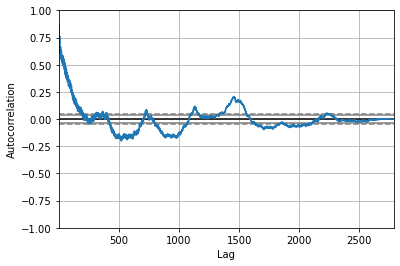

In [14]:
#There is a positive correlation aproximately in the first 250-300 lags.
#After that is almost always negative until ~1.100 lags and it gets negative/around 0 from ~ 1.600 lags
autocorrelation_plot(electricity_brent_weather["Total €/MWh"])

I'm going to start with an ARIMA model, using walk-forward validation but not really estimating or accurately choosing any of the parameters of the model. This will work as a MVP.

Walk Forward Analysis does optimization on a training set; test on a period after the set and then rolls it all forward and repeats the process. We have multiple out-of-sample periods and look at these results combined.

After that, I'll check the model and will start modifying it until I think is optimal. To do this, I'll use the auto-arima function to optimise the ARIMA parameters.

I think the most important thing to notice here is that ARIMA works for univariate time series, so I will only use the electricity price to predict itself.

Also, ARIMA does not work well with seasonal data, so let's firstly check if the electricity prices are stationay or not. I will use a Dickey-Fuller test to do that.

### Checking normality in the time series / Checking Stationary in the time series - Dickey-Fuller test


Let's check if the electricity prices follow a normal distribution:

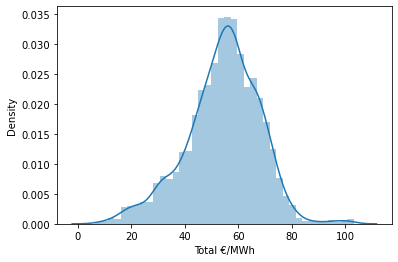

In [15]:
sns.distplot(models_dataset["Total €/MWh"]);

In [16]:
from scipy.stats import normaltest
k2, p = normaltest(models_dataset["Total €/MWh"])

alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.82455e-18
The null hypothesis can be rejected


Looking at the plot, it might looks like the prices follow a normal distribution, maybe with a longer right tail. However, if I test it, the electricity prices do not follow a normal distribution.

I will have to normalise the values before I do an ARIMA model, as this work best with data that follows a normal distribution.

In [17]:
electricity_price = pd.DataFrame(models_dataset["Total €/MWh"])

In [18]:
electricity_price

,Total €/MWh
Date,
2013-05-07,52.950001
2013-05-08,58.959999
2013-05-09,57.939999
2013-05-10,53.639999
2013-05-11,53.599998
...,...
2020-12-27,30.969999
2020-12-28,25.930000
2020-12-29,44.849998


To test for stationarity, I'm going to use a Dickey-Fuller test:

In [19]:
from statsmodels.tsa.stattools import adfuller

y = electricity_price.values
result = adfuller(y)
print('Dickey-Fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Dickey-Fuller Statistic: -3.780973
p-value: 0.003108
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Looking at the ADF Statistic, it is likely to reject the null hypothesis and that means the electricity prices are stationary and do not depend on time.

In this case, the null hypothesis can be rejected with a significance level of less than 1% (the Dickey-Fuller statistic is lower than the critical value at 1% treeshold). 

That means, I can use an ARIMA model to forecast the electricity prices without performing any differencing.

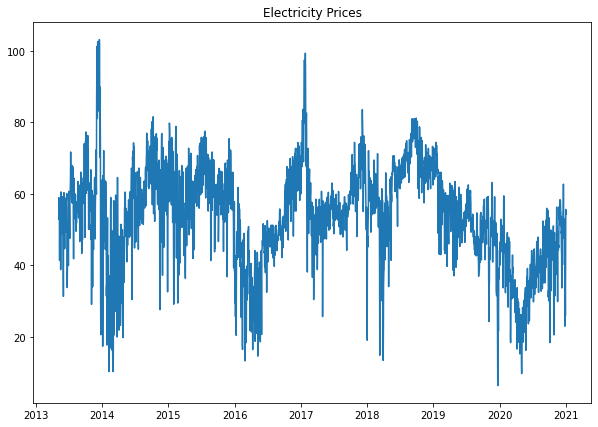

In [20]:
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(electricity_price.index, electricity_price.values);
plt.title('Electricity Prices');

### Walk-forward validation ARIMA

Not optimising any parameter or normalising the data (MPV):

Test RMSE: 4.937
Test MAE: 24.379


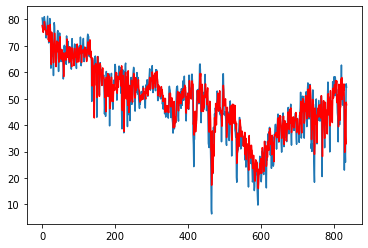

CPU times: user 24min 33s, sys: 12.6 s, total: 24min 46s
Wall time: 20min 24s


In [21]:
%%time
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# splitting into train and test sets

y = electricity_price.values

size = int(len(y) * 0.70) #Train size will be 70% of the dataset

train, test = y[0:size], y[size:len(y)]

history = [y for y in train]

predictions = list()

# walk-forward validation

for t in range(len(test)):
    model = ARIMA(history, order=(10,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
# evaluate forecasts

rmse = mean_squared_error(test, predictions, squared= False)
mae = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

#plotting forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


Looking at the plot above, it looks like the model is working quite well. This is also supported by a RMSE of 4.937
, which means the predictions can vary in less than 5 euros from reality. Looking at the distribution of residuals below, I can see they're around 0, and the mean of residuals is almost 0. 

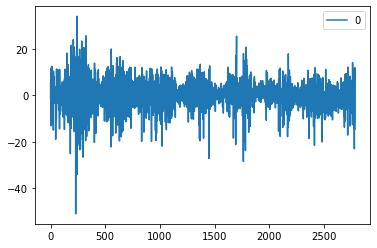

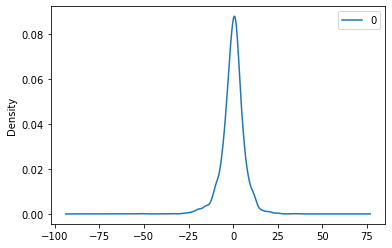

                 0
count  2784.000000
mean     -0.009452
std       6.133139
min     -51.144501
25%      -2.918392
50%       0.324544
75%       3.169558
max      34.116905


In [22]:
# line plot of residuals

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals

residuals.plot(kind='kde')
plt.show()

# summary stats of residuals

print(residuals.describe())

In [23]:
from statsmodels.tsa.arima_model import ARIMAResults

#I'm going to save this model so I can load it at any other poin on time if needed

model_fit.save("ARIMA.pkl")

#To load the model, I would need to use the following code:

loaded_ARIMA = ARIMAResults.load("ARIMA.pkl")

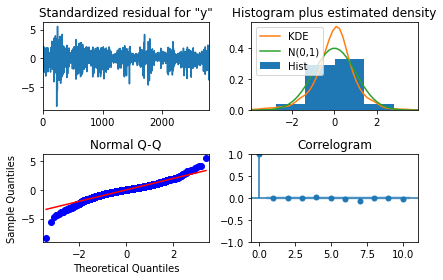

In [24]:
loaded_ARIMA.plot_diagnostics();
plt.tight_layout()

In [25]:
loaded_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2784
Model:                ARIMA(10, 0, 0)   Log Likelihood               -8999.958
Date:                Sat, 15 Jan 2022   AIC                          18023.916
Time:                        16:09:47   BIC                          18095.096
Sample:                             0   HQIC                         18049.617
                               - 2784                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.2398      2.255     24.051      0.000      49.820      58.660
ar.L1          0.7651      0.013     58.755      0.000       0.740       0.791
ar.L2         -0.1904      0.019    -10.257      0.000      -0.227      -0.154
ar.L3          0.1301      0.018      7.421      0.000       0.096       0.164
ar.L4          0.0546      0.017      3.230      0.001       0.021       0.088
ar.L5         -0.0273      0.018     -1.546      0.122      -0.062       0.007
ar.L6          0.0763      0.018      4.356      0.000       0.042       0.111
ar.L7          0.3529      0.018     20.137      0.000       0.319       0.387
ar.L8         -0.2428      0.018    -13.256      0.000      -0.279      -0.207
ar.L9          0.0591      0.020      2.909      0.004       0.019       0.099
ar.L10        -0.0331      0.015     -2.214      0.027      -0.062      -0.004
sigma2        37.5837      0.624     60.260      0.000      36.361      38.806
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2282.56
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
print('Observations: %d' % (len(y)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 2785
Training Observations: 1949
Testing Observations: 836


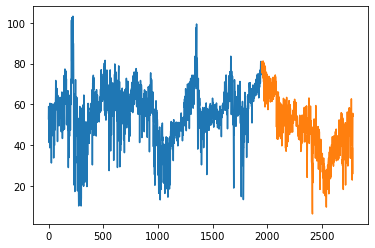

In [27]:
#This shows us in a plot the 2785 observations divided by train (in blue, 1949) and test (in orange, 836)
pd.plotting.register_matplotlib_converters()
plt.plot(train)
plt.plot([None for i in train] + [y for y in test])
plt.show()

### Out of sample forecasting

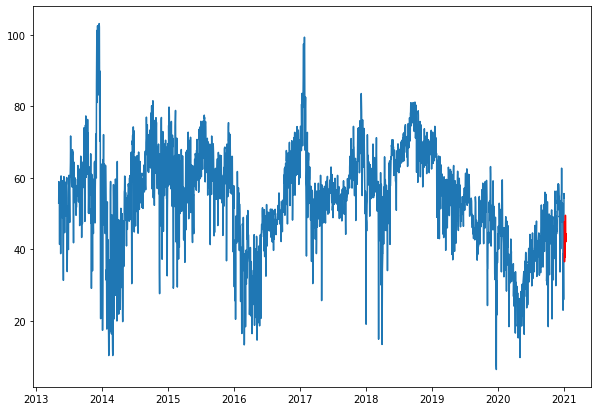

In [28]:
#Creating new rows for 10 days ahead predictions.

rows_predictions = pd.DataFrame(index = pd.date_range("2021-01-01", periods = 10, freq = "D")).rename_axis("Date")
rows_predictions.index = pd.DatetimeIndex(rows_predictions.index, dayfirst= True)

#Out-of-Sample Forecast

rows_predictions["pred"] = loaded_ARIMA.forecast(steps = 10)

#Concatenating predictions to electricity prices dataframe

electricity_price_predictions = pd.concat([electricity_price, pd.DataFrame(rows_predictions)], ignore_index=False)
electricity_price_predictions.index = pd.DatetimeIndex(electricity_price_predictions.index, dayfirst= True)

#Plotting actual values and predictions out of sample

fig, axes = plt.subplots(figsize=(10,7));
plt.plot(electricity_price_predictions.index, electricity_price_predictions["Total €/MWh"].values)
plt.plot(electricity_price_predictions.index, electricity_price_predictions["pred"].values, color='red')

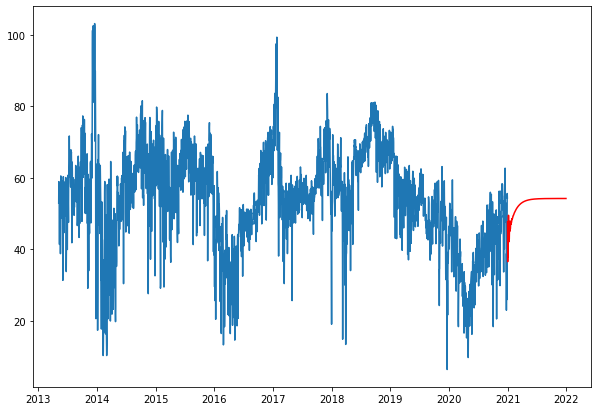

In [29]:
#Creating new rows for 1 year ahead predictions.

rows_predictions = pd.DataFrame(index = pd.date_range("2021-01-01", periods = 365, freq = "D")).rename_axis("Date")
rows_predictions.index = pd.DatetimeIndex(rows_predictions.index, dayfirst= True)

#Out-of-Sample Forecast

rows_predictions["pred"] = loaded_ARIMA.forecast(steps = 365)

#Concatenating predictions to electricity prices dataframe

electricity_price_predictions = pd.concat([electricity_price, pd.DataFrame(rows_predictions)], ignore_index=False)
electricity_price_predictions.index = pd.DatetimeIndex(electricity_price_predictions.index, dayfirst= True)

#Plotting actual values and predictions out of sample

fig, axes = plt.subplots(figsize=(10,7));
plt.plot(electricity_price_predictions.index, electricity_price_predictions["Total €/MWh"].values)
plt.plot(electricity_price_predictions.index, electricity_price_predictions["pred"].values, color='red')

Based on the nature of the ARIMA equations, out-of-sample forecasts tend to converge to the sample mean for long forecasting periods.

https://stackoverflow.com/questions/45596492/statsmodels-arima-different-results-using-predict-and-forecast


In [30]:
electricity_price_predictions.tail()

,Total €/MWh,pred
Date,,
2021-12-27,NaN,54.238753
2021-12-28,NaN,54.238780
2021-12-29,NaN,54.238807
2021-12-30,NaN,54.238833
2021-12-31,NaN,54.238858


In [31]:
electricity_price.mean()

Total €/MWh    54.241344
dtype: float32

In [32]:
#import sys
#print(sys.executable)
#!conda info
#!conda list

### Testing for normality - Normalisation and standarisation

In [33]:
y = electricity_price.values

size = int(len(y) * 0.70) #Train size will be 70% of the dataset

train, test = y[0:size], y[size:len(y)]

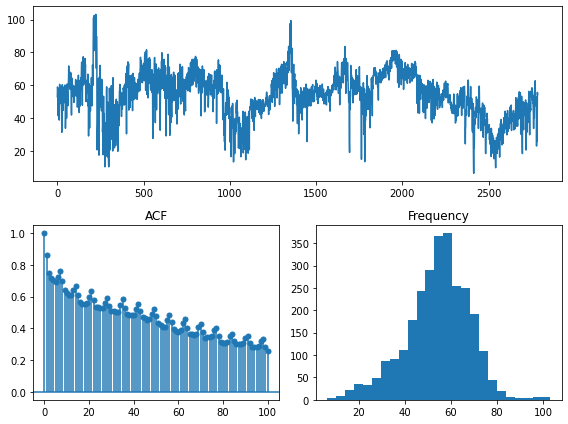

In [34]:
from pmdarima.utils import tsdisplay

tsdisplay(y, lag_max = 100)

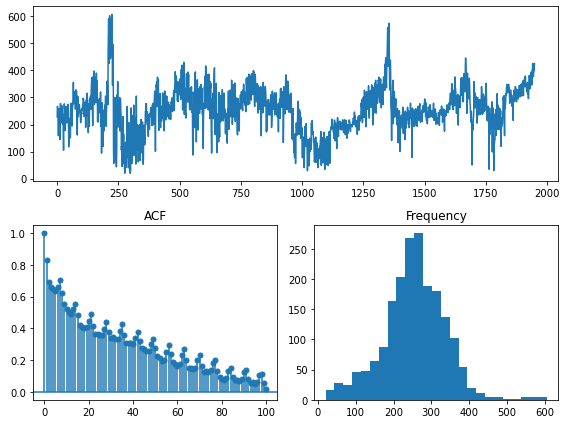

In [35]:
#Box-Cox Transformation

from pmdarima.preprocessing import BoxCoxEndogTransformer

train_bc, _ = BoxCoxEndogTransformer(lmbda2=1e-6).fit_transform(train)

tsdisplay(train_bc, lag_max= 100)

In [36]:
k2, p = normaltest(train_bc)

alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.15861e-13
The null hypothesis can be rejected


The Box-Cox transformation do not seem to work with my data (it does not transform it so it follows a normal distribution). Therefore, I'm going to try a MinMaxScaler from scikit-learn:

Min: 10.270000, Max: 103.209999
---------
[0.45922095]
[0.5238863]
[0.5129115]
[0.46664512]
[0.46621472]
---------
[52.949997]
[58.96]
[57.94]
[53.640003]
[53.6]


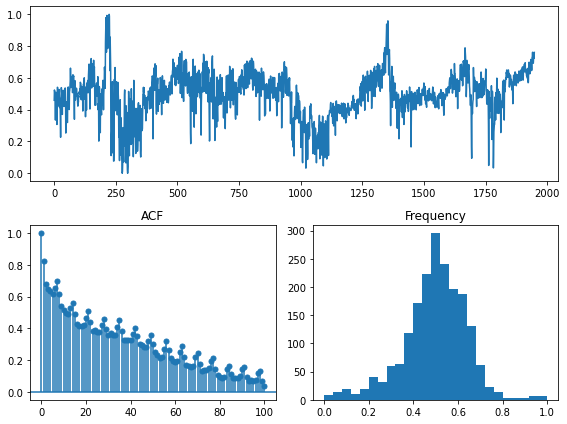

In [37]:
#Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

# train the normalization

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(train)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

print("---------")

# normalise the train dataset and print the first 5 rows

normalised = scaler.transform(train)
for i in range(5):
    print(normalised[i])

print("---------")    
# inverse transform and print the first 5 rows

inversed = scaler.inverse_transform(normalised)
for i in range(5):
    print(inversed[i])
    
tsdisplay(normalised, lag_max= 100)

In [38]:
k2, p = normaltest(normalised)

alpha = 0.05

print(p)

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

[8.65746612e-27]
The null hypothesis can be rejected


The Min-Max scaler also doesn't change the distribution of my data, only the range of the values (between 0 and 1). This might be interesting when using a model with different variables that have different value ranges.

A Standar Scaler (used below) also do not seem to help to transform the electricity prices to follow a Gaussian distribution.

In [39]:
#Standard Scaler

from sklearn.preprocessing import StandardScaler

# train the standardisation

scaler = StandardScaler()
scaler = scaler.fit(train)
print('Mean: %f, Standard Deviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

# standarise the train dataset and print the first 5 rows

normalised = scaler.transform(train)
for i in range(5):
    print(normalised[i])
# inverse transform and print the first 5 rows

inversed = scaler.inverse_transform(normalised)
for i in range(5):
    print(inversed[i])

Mean: 56.514300, Standard Deviation: 13.171921
[-0.27059826]
[0.18567523]
[0.10823775]
[-0.21821421]
[-0.22125104]
[52.95]
[58.96]
[57.94]
[53.64]
[53.6]


In [40]:
k2, p = normaltest(normalised)

alpha = 0.05

print(p)

if p < alpha:  # null hypothesis: electricity prices comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

[8.65687168e-27]
The null hypothesis can be rejected


In [41]:
#!conda search --channel conda-forge fitter
#pip install fitter

In [42]:
from fitter import Fitter, get_common_distributions, get_distributions

,sumsquare_error,aic,bic,kl_div
burr,0.000623,1121.152995,-42613.143025,inf
norm,0.001000,1123.310003,-41312.011575,inf
gamma,0.001381,1112.758358,-40406.849268,inf


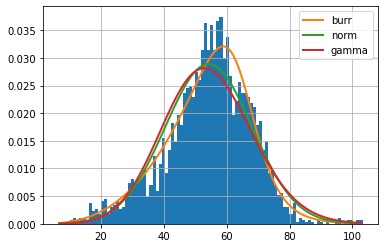

In [43]:
f = Fitter(y,distributions=["gamma","burr","norm"])
f.fit()
f.summary()

In [44]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 13.894075517176073,
  'd': 0.26561995424717144,
  'loc': -0.27495882754038525,
  'scale': 66.89209472929053}}

So it seems that electricity prices follow a Burr distribution. However, looking at the sum square error, aic and bic values from the normal distribution and comparing those to the burr distribution, and also looking at the shape of the histogram, I'm going to assume that the electricity prices are Gaussian-like for the purpose of this project.

### Checking Seasonality and Trend

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decomposition_plot(ts):
    
# Apply seasonal_decompose 
    
    decomposition = seasonal_decompose(x = ts, model = "additive",
                                          period= int(len(ts)/2))
    
# Get trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plotting
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(ts), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='red')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='orange')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='green')
    plt.legend(loc='best')
    plt.tight_layout()

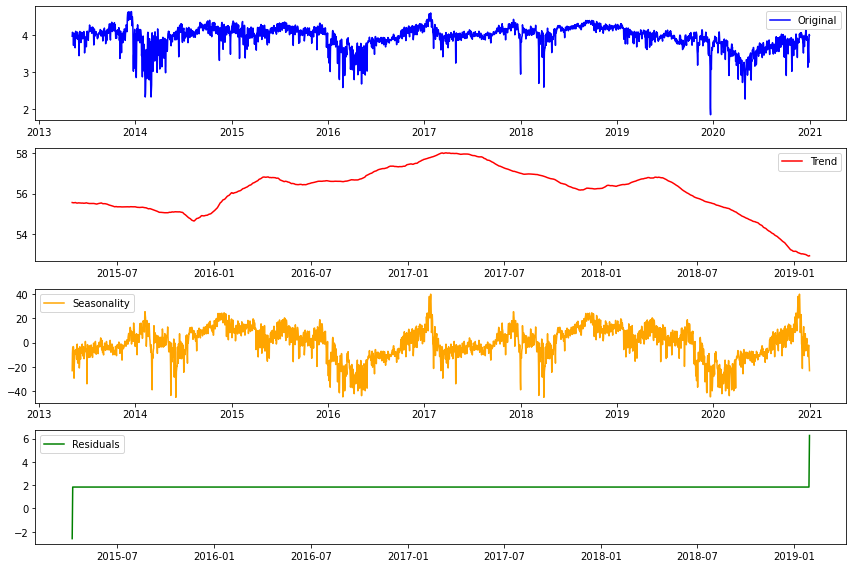

In [46]:
decomposition_plot(electricity_price)

From the plots above, it looks like the electricity prices time series do not follow a particular trend and also, are not seasonal.

### Checking autocorrelation

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.ticker import MaxNLocator

def plot_acf_pacf(ts, figsize=(15,8),lags=1000):
    
    fig,ax = plt.subplots(nrows=3, figsize=figsize)
    
    # Plot time series
    ts.plot(ax=ax[0])
    
    # Plot acf, pavf
    plot_acf(ts, ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags) 
    fig.tight_layout()
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    return fig,ax

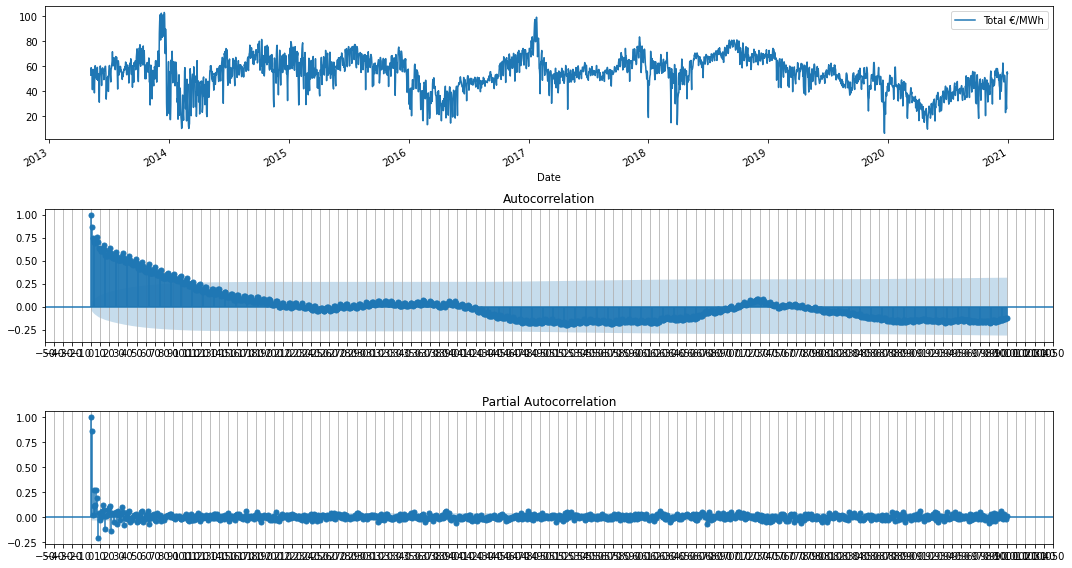

In [48]:
plot_acf_pacf(electricity_price);
plt.tight_layout()

The autocorrelation plots above also confirm that there is no seasonality or trend in the electricity prices.

### Findings
A summary of all the findings related to electricity prices:

- They do not follow a normal distribution, but the distribution is Gaussian-like, so I will assume they are "normal".
- They are not seasonal.
- They are stationary.
- They don't follow a particular trend.

### Auto-ARIMA

Now, I'm going to improve the ARIMA model, changing its parameters so I'm using the optimal order for the model.

In [49]:
%%time
from pmdarima import auto_arima

y = electricity_price.values

model_auto_ARIMA = auto_arima(y, start_p= 1, start_q= 1, stationary= True, seasonal = False,
                             stepwise= True, error_action= "trace", suppress_warnings= True)

CPU times: user 48 s, sys: 256 ms, total: 48.3 s
Wall time: 43.7 s


In [50]:
model_auto_ARIMA

ARIMA(order=(5, 0, 5), scoring_args={}, suppress_warnings=True)

### Walk-forward validation ARIMA

ARIMA(order=(5, 0, 5))

Test RMSE: 4.869
Test MAE: 23.711


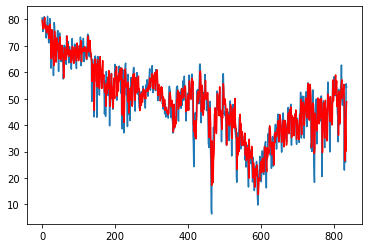

CPU times: user 59min 10s, sys: 6.9 s, total: 59min 16s
Wall time: 59min 15s


In [51]:
%%time
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# splitting into train and test sets

y = electricity_price.values

size = int(len(y) * 0.70) #Train size will be 70% of the dataset

train, test = y[0:size], y[size:len(y)]

history = [y for y in train]

predictions = list()

# walk-forward validation

for t in range(len(test)):
    model = ARIMA(history, order=(5,0,5))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
# evaluate forecasts

rmse = mean_squared_error(test, predictions, squared= False)
mae = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

# plotting forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [52]:
#I'm going to save this model so I can load it at any other poin on time if needed

model_fit.save("optimisedARIMA.pkl")

#To load the model, I would need to use the following code:

loaded_ARIMA = ARIMAResults.load("optimisedARIMA.pkl")

### Out of sample forecasting

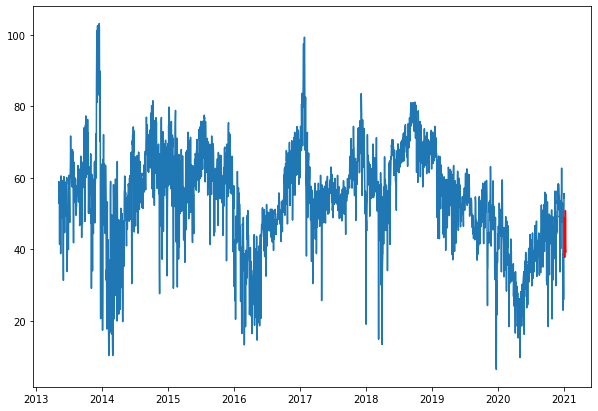

In [53]:
#Creating new rows for 10 days ahead predictions.

rows_predictions = pd.DataFrame(index = pd.date_range("2021-01-01", periods = 10, freq = "D")).rename_axis("Date")
rows_predictions.index = pd.DatetimeIndex(rows_predictions.index, dayfirst= True)

#Out-of-Sample Forecast

rows_predictions["pred"] = loaded_ARIMA.forecast(steps = 10)

#Concatenating predictions to electricity prices dataframe

electricity_price_predictions = pd.concat([electricity_price, pd.DataFrame(rows_predictions)], ignore_index=False)
electricity_price_predictions.index = pd.DatetimeIndex(electricity_price_predictions.index, dayfirst= True)

#Plotting actual values and predictions out of sample

fig, axes = plt.subplots(figsize=(10,7));
plt.plot(electricity_price_predictions.index, electricity_price_predictions["Total €/MWh"].values)
plt.plot(electricity_price_predictions.index, electricity_price_predictions["pred"].values, color='red')

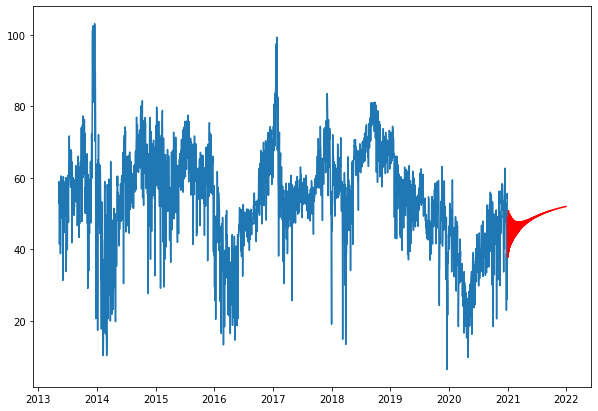

In [54]:
#Creating new rows for 1 year ahead predictions.

rows_predictions = pd.DataFrame(index = pd.date_range("2021-01-01", periods = 365, freq = "D")).rename_axis("Date")
rows_predictions.index = pd.DatetimeIndex(rows_predictions.index, dayfirst= True)

#Out-of-Sample Forecast

rows_predictions["pred"] = loaded_ARIMA.forecast(steps = 365)

#Concatenating predictions to electricity prices dataframe

electricity_price_predictions = pd.concat([electricity_price, pd.DataFrame(rows_predictions)], ignore_index=False)
electricity_price_predictions.index = pd.DatetimeIndex(electricity_price_predictions.index, dayfirst= True)

#Plotting actual values and predictions out of sample

fig, axes = plt.subplots(figsize=(10,7));
plt.plot(electricity_price_predictions.index, electricity_price_predictions["Total €/MWh"].values)
plt.plot(electricity_price_predictions.index, electricity_price_predictions["pred"].values, color='red')

In [55]:
#Based on the nature of the ARIMA equations, out-of-sample forecasts tend to converge to the sample mean for long forecasting periods.
electricity_price_predictions.tail()

,Total €/MWh,pred
Date,,
2021-12-27,NaN,51.954622
2021-12-28,NaN,51.976067
2021-12-29,NaN,51.989585
2021-12-30,NaN,51.986772
2021-12-31,NaN,51.998878


In [56]:
electricity_price.mean()

Total €/MWh    54.241344
dtype: float32

The above ARIMA model works better than the first one, with a RMSE of 4.869 euros. However, we can see that the predictions are not in line with reality. In December 2021, the mean price is around 300€. This huge increase was not capture but these models because historical prices weren't this high ever before.

Also, I'm only using the past electricity prices to forecast.

Now, I'm going to use different models that take into account other variables of my dataset.

## Vector Auto Regression (VAR)

In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables.

The VAR class assumes that the passed time series are stationary. Non-stationary or trending data can often be transformed to be stationary by first-differencing or some other method: https://www.statsmodels.org/dev/vector_ar.html?highlight=var%20model#module-statsmodels.tsa.vector_ar.var_model

Electricity prices until 2020 are stationary, but I will check if all the other variables are stationary.

### Testing stationary in relevant variables - ADF

In [57]:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('Dickey-Fuller Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [58]:
print('Augmented Dickey-Fuller Test: Total energy MWh Time Series')
augmented_dickey_fuller_statistics(models_dataset['Energía final MWh'])

print('Augmented Dickey-Fuller Test: Closing price Brent Time Series')
augmented_dickey_fuller_statistics(models_dataset['Precio cierre Brent'])

print('Augmented Dickey-Fuller Test: Maximum temperature Time Series')
augmented_dickey_fuller_statistics(models_dataset['Tmax'])

print('Augmented Dickey-Fuller Test: Minimum temperature Time Series')
augmented_dickey_fuller_statistics(models_dataset['Tmin'])

print('Augmented Dickey-Fuller Test: Average Wind Speed (Km/h) Time Series')
augmented_dickey_fuller_statistics(models_dataset['Vmax'])

Augmented Dickey-Fuller Test: Total energy MWh Time Series
Dickey-Fuller Statistic: -6.124226
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Augmented Dickey-Fuller Test: Closing price Brent Time Series
Dickey-Fuller Statistic: -1.711204
p-value: 0.425350
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Augmented Dickey-Fuller Test: Maximum temperature Time Series
Dickey-Fuller Statistic: -3.023195
p-value: 0.032784
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Augmented Dickey-Fuller Test: Minimum temperature Time Series
Dickey-Fuller Statistic: -3.240108
p-value: 0.017777
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Augmented Dickey-Fuller Test: Average Wind Speed (Km/h) Time Series
Dickey-Fuller Statistic: -8.834887
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Looking at the p-value of all variables above, we can determine that the Brent oil crude prices are a non-stationary series, while all the other variables are stationary.

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Let's double check that this the case:

In [59]:
years = models_dataset.resample("Y").mean()
years

,Energía final MWh,Total €/MWh,Precio cierre Brent,Tmax,Tmin,Vmax
Date,,,,,,
2013-12-31,710924.0000,59.655544,108.124161,23.422705,11.830986,17.965405
2014-12-31,711462.1250,53.299641,99.428925,21.159153,10.430418,18.798601
2015-12-31,726983.7500,61.178432,53.678406,21.514978,10.195574,17.935427
2016-12-31,733801.4375,47.257324,45.110409,21.130482,10.079815,18.131355
2017-12-31,741894.8125,59.263626,54.847801,21.954067,9.988770,17.772390
2018-12-31,736320.6250,63.564960,71.565346,20.759390,10.043809,18.209433
2019-12-31,733829.3750,52.481125,64.198654,21.520739,9.914580,18.635952
2020-12-31,709097.6250,39.028233,43.268894,21.589195,10.417952,17.735336


In [60]:
years.describe()

,Energía final MWh,Total €/MWh,Precio cierre Brent,Tmax,Tmin,Vmax
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,725539.250000,54.466110,67.527824,21.631338,10.362738,18.147987
std,13119.871094,8.223539,24.309767,0.808420,0.622642,0.388281
min,709097.625000,39.028233,43.268894,20.759390,9.914580,17.735336
25%,711327.593750,51.175175,51.536407,21.151985,10.030049,17.894668
50%,730392.593750,56.281633,59.523228,21.517859,10.137694,18.048380
75%,734452.187500,60.036266,78.531240,21.680413,10.421068,18.316062
max,741894.812500,63.564960,108.124161,23.422705,11.830986,18.798601


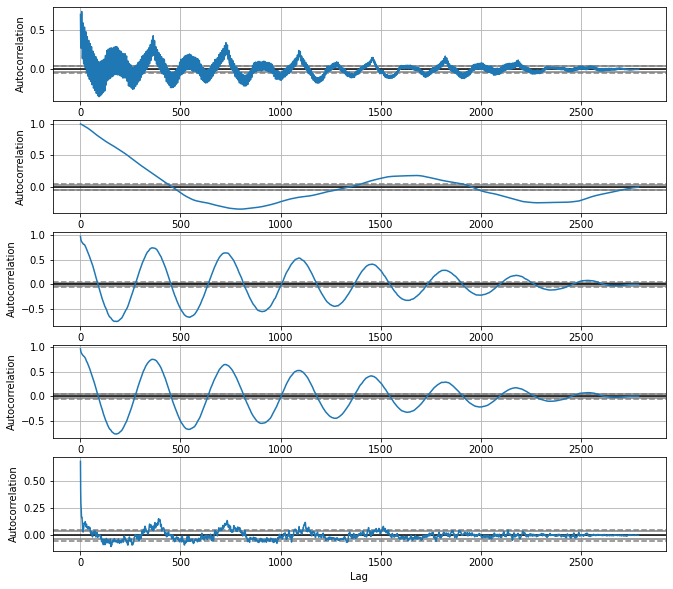

In [61]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(11,10))

autocorrelation_plot(models_dataset["Energía final MWh"], ax= ax1)
autocorrelation_plot(models_dataset["Precio cierre Brent"], ax = ax2)
autocorrelation_plot(models_dataset["Tmax"], ax = ax3)
autocorrelation_plot(models_dataset["Tmin"], ax = ax4)
autocorrelation_plot(models_dataset["Vmax"], ax = ax5);

Looking at the autocorrelation plots, the Brent oil crude prices do not seem to be constant over time. Same conclusion if we look at the mean and the standard deviation of each series over the years.

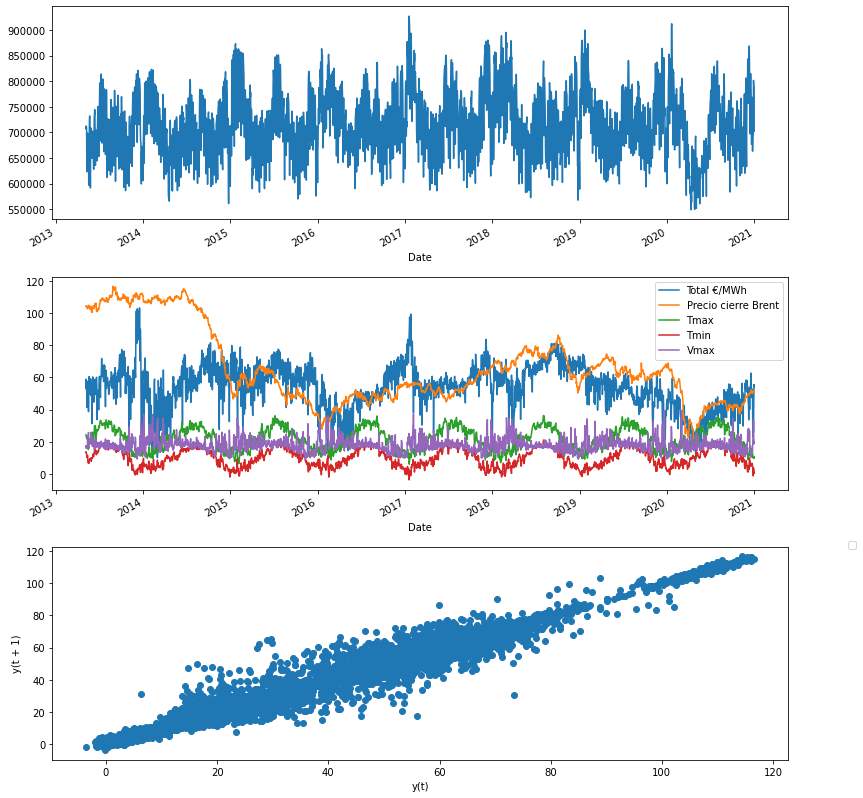

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12,11))

#series plot

models_dataset["Energía final MWh"].plot(ax = ax1)

models_dataset.drop("Energía final MWh", axis = 1).plot(ax = ax2)

plt.legend(bbox_to_anchor=(1.1, 1.05), loc="upper right")

plt.tight_layout()

#lag plot
pd.plotting.lag_plot(models_dataset.drop("Energía final MWh", axis = 1))
plt.show()

The plot above shows some relationships among the series,showing also some outliers.

The linear shape of the lag plot indicates the presence of positive auto-correlation.

### First order differencing for non-stationary series and removing seasonality from series

Let's now transform the Brent oil crude future prices to make them stationary and let's remove seasonality from the other variables.

I'll use a Standar Scaler to standardise features by removing the mean and scaling to unit variance.

In [63]:
#creating the train and validation set

train = models_dataset[:int(0.7*(len(models_dataset)))]
test = models_dataset[int(0.7*(len(models_dataset))):]

print(train.shape)
print(test.shape)

(1949, 6)
(836, 6)


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaler = scaler.fit(train)
normalised_train = pd.DataFrame(train_scaler.transform(train), columns = models_dataset.columns, index = train.index)

normalised_train_diff = (normalised_train).diff().fillna(0)
normalised_train_diff.describe()

,Energía final MWh,Total €/MWh,Precio cierre Brent,Tmax,Tmin,Vmax
count,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000
mean,0.000299,0.001091,-0.000509,0.000329,0.000352,-0.000272
std,0.789569,0.593772,0.039271,0.223189,0.234212,0.792168
min,-2.294626,-3.265280,-0.219754,-0.955014,-1.145540,-4.125962
25%,-0.479994,-0.302158,-0.015294,-0.128090,-0.131546,-0.393612
50%,-0.049597,-0.019739,0.000000,0.011128,-0.000904,-0.021927
75%,0.313642,0.265717,0.014087,0.148256,0.133839,0.404974
max,2.532236,2.707274,0.179909,0.739920,1.056180,3.998871


Looking at the plots below, it could be understood that the dataset looks like normalised:

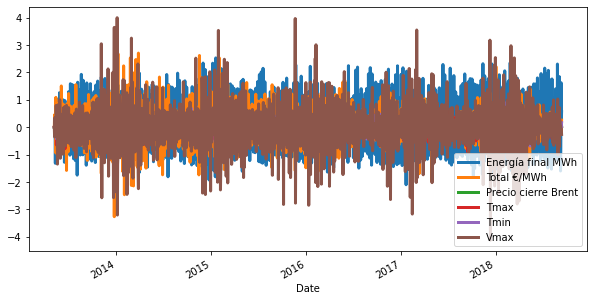

In [65]:
normalised_train_diff.plot(figsize=(10,5), linewidth = 3);

### Testing stationary in transformed series - ADF

In [66]:
print('Augmented Dickey-Fuller Test: Total energy MWh Time Series')
augmented_dickey_fuller_statistics(normalised_train_diff['Energía final MWh'])

print('Augmented Dickey-Fuller Test: Total €/MWh Time Series')
augmented_dickey_fuller_statistics(normalised_train_diff['Total €/MWh'])

print('Augmented Dickey-Fuller Test: Closing price Brent Time Series')
augmented_dickey_fuller_statistics(normalised_train_diff['Precio cierre Brent'])

print('Augmented Dickey-Fuller Test: Maximum temperature Time Series')
augmented_dickey_fuller_statistics(normalised_train_diff['Tmax'])

print('Augmented Dickey-Fuller Test: Minimum temperature Time Series')
augmented_dickey_fuller_statistics(normalised_train_diff['Tmin'])

print('Augmented Dickey-Fuller Test: Average Wind Speed (Km/h) Time Series')
augmented_dickey_fuller_statistics(normalised_train_diff['Vmax'])

Augmented Dickey-Fuller Test: Total energy MWh Time Series
Dickey-Fuller Statistic: -12.440749
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Augmented Dickey-Fuller Test: Total €/MWh Time Series
Dickey-Fuller Statistic: -12.156349
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Augmented Dickey-Fuller Test: Closing price Brent Time Series
Dickey-Fuller Statistic: -46.992113
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Augmented Dickey-Fuller Test: Maximum temperature Time Series
Dickey-Fuller Statistic: -11.605793
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Augmented Dickey-Fuller Test: Minimum temperature Time Series
Dickey-Fuller Statistic: -8.524360
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Augmented Dickey-Fuller Test: Average Wind Speed (Km/h) Time Series
Dickey-Fuller Statistic: -15.933700
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863

All time series are now stationary.

In [67]:
#The Johansen Test can be used to check for cointegration between a maximum of 12-time series.

from statsmodels.tsa.vector_ar.vecm import coint_johansen

coint_johansen(normalised_train_diff,0,1).eig

array([0.53829508, 0.51189979, 0.50156346, 0.45661991, 0.36934779,
       0.34913714])

In [68]:
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
cointegration_rank = select_coint_rank(normalised_train_diff,0,1)
print(cointegration_rank)

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   6          7178.          95.75
  1   6          5673.          69.82
  2   6          4277.          47.85
  3   6          2921.          29.80
  4   6          1734.          15.49
  5   6          836.2          3.841
-------------------------------------


The test statistics are higher than the critical values for all variables(series). This means the null hypotesis can be rejected at a 95% confidence level.

The null hypotesis was that the variables are not cointegrated, so rejecting the null hypotesis means that the variables (series) are cointegrated.

### Lag order selection VAR and model fitting and predictions

In [69]:
#Adding the period to the index, otherwise I get a warning saying the date won't be taken into consideration when forecasting
normalised_train_diff.index = pd.DatetimeIndex(normalised_train_diff.index, dayfirst= True).to_period("D")

In [70]:
#Initiating the VAR model and using AIC to determine the lag order value

from statsmodels.tsa.vector_ar.var_model import VAR

model_VAR = VAR(endog= normalised_train_diff)
res = model_VAR.select_order(20)
res.summary()

,AIC,BIC,FPE,HQIC
0,-15.44,-15.42,1.977e-07,-15.43
1,-15.82,-15.69,1.354e-07,-15.77
2,-16.19,-15.97,9.286e-08,-16.11
3,-16.28,-15.95,8.476e-08,-16.16
4,-16.41,-15.98,7.434e-08,-16.26
5,-16.79,-16.26,5.094e-08,-16.60
6,-17.00,-16.36,4.153e-08,-16.76
7,-17.37,-16.63*,2.845e-08,-17.10*
8,-17.37,-16.52,2.871e-08,-17.05
9,-17.35,-16.40,2.917e-08,-17.00


In [71]:
#fitting the model
model_fit_VAR = model_VAR.fit(maxlags= 15)

#predictions on validation

prediction_VAR = model_fit_VAR.forecast(model_fit_VAR.y, steps=len(test))
prediction_VAR

array([[-9.53632767e-02,  1.13707220e-02,  4.62855955e-03,
         1.42047817e-02, -3.63390370e-02,  9.69290632e-02],
       [-2.13943515e-01, -3.06987347e-01,  2.83514314e-03,
        -8.34950005e-02,  3.58342696e-02,  3.53667532e-01],
       [-1.26267320e+00, -4.27618954e-01,  3.50559621e-04,
        -5.92116010e-02, -4.69452645e-02, -1.94733542e-03],
       ...,
       [ 1.87425254e-04,  9.30136743e-04, -4.99006157e-04,
         7.67346725e-04,  8.31729897e-04, -3.54947350e-04],
       [ 2.27542160e-04,  9.49169396e-04, -4.99244689e-04,
         7.68927826e-04,  8.31633693e-04, -3.56945118e-04],
       [ 2.91712942e-04,  9.77705577e-04, -4.99387406e-04,
         7.69231657e-04,  8.32271017e-04, -3.57926614e-04]])

The array above shows the predictions, where each list represents the predictions of each row.

I need to invert the transformation I did before to its original scale, and also let's present the results in a Dataframe format:

In [72]:
#transforming the predictions into a Dataframe

cols = models_dataset.columns

pred = pd.DataFrame(index= test.index,columns=cols)

for j in range(0,6):
    for i in range(0, len(prediction_VAR)):
       pred.iloc[i][j] = prediction_VAR[i][j]

pred

,Energía final MWh,Total €/MWh,Precio cierre Brent,Tmax,Tmin,Vmax
Date,,,,,,
2018-09-13,-0.0953633,0.0113707,0.00462856,0.0142048,-0.036339,0.0969291
2018-09-14,-0.213944,-0.306987,0.00283514,-0.083495,0.0358343,0.353668
2018-09-15,-1.26267,-0.427619,0.00035056,-0.0592116,-0.0469453,-0.00194734
2018-09-16,-0.498509,-0.101998,-0.00324331,0.0428468,-0.0428534,-0.161592
2018-09-17,1.28657,0.541604,-0.00856708,0.0708027,0.088387,0.00686345
...,...,...,...,...,...,...
2020-12-27,0.000224967,0.000947133,-0.000498897,0.000767571,0.000831416,-0.000356074
2020-12-28,0.000211144,0.000941927,-0.000498889,0.000766975,0.000831941,-0.000354665
2020-12-29,0.000187425,0.000930137,-0.000499006,0.000767347,0.00083173,-0.000354947


To bring it back up to its original scale, I need to de-difference to the original input data.

In [73]:
pred.dtypes

Energía final MWh      object
Total €/MWh            object
Precio cierre Brent    object
Tmax                   object
Tmin                   object
Vmax                   object
dtype: object

In [74]:
#Let's converts each column to the correct data type

pred['Energía final MWh'] = pred[['Energía final MWh']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Total €/MWh'] = pred[['Total €/MWh']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred['Precio cierre Brent'] = pred[['Precio cierre Brent']].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Tmax"] = pred[["Tmax"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Tmin"] = pred[["Tmin"]].apply(pd.to_numeric, downcast="float", errors= "coerce")
pred["Vmax"] = pred[["Vmax"]].apply(pd.to_numeric, downcast="float", errors= "coerce")

In [75]:
type(pred)

pandas.core.frame.DataFrame

In [76]:
#inverting transformation

def invert_transformation(train, pred_df):
    forecast = pred.copy()
    columns = train.columns
    for col in columns:
        forecast[str(col)] = train[col].iloc[-1] + forecast[str(col)].cumsum()
    return forecast

output = invert_transformation(normalised_train_diff, pred)
output_original = pd.DataFrame(train_scaler.inverse_transform(output), columns= train.columns, index= test.index)

In [77]:
output_original

,Energía final MWh,Total €/MWh,Precio cierre Brent,Tmax,Tmin,Vmax
Date,,,,,,
2018-09-13,758389.2500,60.074070,70.656471,22.034554,11.144042,17.588089
2018-09-14,744633.6250,56.030457,70.726913,21.447214,11.346200,19.026199
2018-09-15,663449.2500,50.397892,70.735619,21.030695,11.081360,19.018280
2018-09-16,631397.2500,49.054386,70.655037,21.332096,10.839602,18.361202
2018-09-17,714118.1250,56.188351,70.442177,21.830153,11.338236,18.389111
...,...,...,...,...,...,...
2020-12-27,729804.6875,66.408127,60.573986,26.286499,15.226087,17.346436
2020-12-28,729818.3125,66.420532,60.561588,26.291893,15.230780,17.344994
2020-12-29,729830.3125,66.432785,60.549191,26.297291,15.235472,17.343552


In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

#Checking the Root Mean Square Error

for i in cols:
    print('RMSE for', i, 'is: ', sqrt(mean_squared_error(output_original[i], test[i])))

RMSE for Energía final MWh is:  66764.76196317935
RMSE for Total €/MWh is:  20.186654182406706
RMSE for Precio cierre Brent is:  15.333997186857786
RMSE for Tmax is:  7.244981541580475
RMSE for Tmin is:  6.198003004311556
RMSE for Vmax is:  4.300971280784131


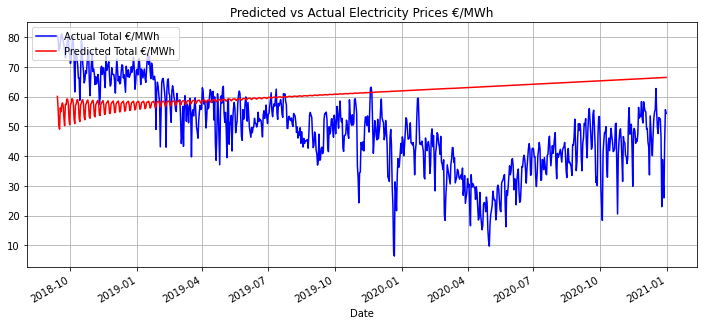

In [79]:
plt.figure(figsize=(12,5))
plt.xlabel("Date")

ax1 = test["Total €/MWh"].plot(color= "blue", grid = True, label = "Actual Total €/MWh")
ax2 = output_original["Total €/MWh"].plot(color= "red", grid = True, label = "Predicted Total €/MWh")

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title( "Predicted vs Actual Electricity Prices €/MWh")
plt.show()

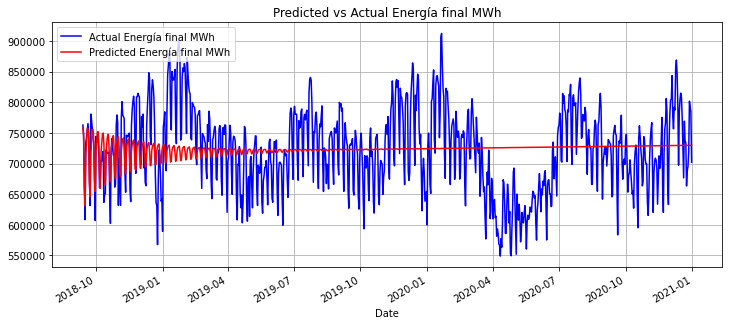

In [80]:
plt.figure(figsize=(12,5))
plt.xlabel("Date")

ax1 = test["Energía final MWh"].plot(color= "blue", grid = True, label = "Actual Energía final MWh")
ax2 = output_original["Energía final MWh"].plot(color= "red", grid = True, label = "Predicted Energía final MWh")

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title( "Predicted vs Actual Energía final MWh")
plt.show()

What the graphs above show, is that these models do not work very well with long-term forecasts, and they tend to converge to the sample mean for long forecasting periods.

In [81]:
output_original.describe()

,Energía final MWh,Total €/MWh,Precio cierre Brent,Tmax,Tmin,Vmax
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,723470.250000,61.210621,65.699066,24.052641,13.285079,17.946335
std,10779.467773,3.169457,2.990168,1.305695,1.134510,0.355286
min,631397.250000,49.054386,60.524380,21.030695,10.839602,17.340645
25%,722662.703125,58.792665,63.112977,22.927431,12.306307,17.641689
50%,724791.062500,61.232388,65.700878,24.053366,13.285929,17.943476
75%,727618.968750,63.842078,68.282627,25.180450,14.265290,18.244286
max,758389.250000,66.458160,70.869453,26.308111,15.244859,19.082453


In [82]:
#I'm going to save this model so I can load it at any other poin on time if needed

dump(model_fit_VAR, open("model_VAR.pkl", "wb"))

#To load the model, I would need to use the following code:

VAR_loaded = load(open("model_VAR.pkl", "rb"))

In [83]:
VAR_loaded.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 15, Jan, 2022
Time:                     17:10:08
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -15.8320
Nobs:                     1934.00    HQIC:                  -16.8256
Log likelihood:           910.041    FPE:                2.76592e-08
AIC:                     -17.4037    Det(Omega_mle):     2.09907e-08
--------------------------------------------------------------------
Results for equation Energía final MWh
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                          -0.000491         0.010077           -0.049           0.961
L1.Energía final MWh           -0.263141         0.025145          -10.465           0.000
L1.Total

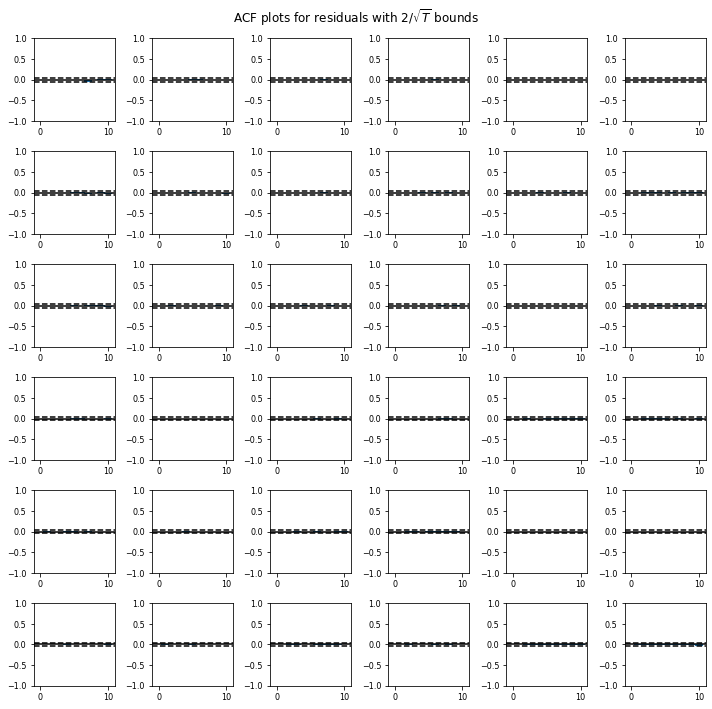

In [84]:
VAR_loaded.plot_acorr();
plt.tight_layout()

In [85]:
VAR_loaded.stderr

,Energía final MWh,Total €/MWh,Precio cierre Brent,Tmax,Tmin,Vmax
const,0.010077,0.010375,0.000897,0.004549,0.004547,0.016361
L1.Energía final MWh,0.025145,0.025886,0.002238,0.011351,0.011345,0.040823
L1.Total €/MWh,0.029905,0.030787,0.002662,0.013500,0.013494,0.048552
L1.Precio cierre Brent,0.261777,0.269494,0.023300,0.118172,0.118116,0.424999
L1.Tmax,0.056826,0.058501,0.005058,0.025653,0.025641,0.092258
...,...,...,...,...,...,...
L15.Total €/MWh,0.029871,0.030751,0.002659,0.013484,0.013478,0.048496
L15.Precio cierre Brent,0.264084,0.271869,0.023505,0.119214,0.119157,0.428744
L15.Tmax,0.058425,0.060147,0.005200,0.026374,0.026362,0.094854
L15.Tmin,0.052843,0.054401,0.004703,0.023855,0.023843,0.085791


In [86]:
#Adding the period to the index, otherwise I get a warning saying the date won't be taken into consideration when forecasting
models_dataset.index = pd.DatetimeIndex(models_dataset.index, dayfirst= True).to_period("D")

#predictions for 2 day ahead

model_VAR = VAR(endog=models_dataset)
model_fit_VAR = model_VAR.fit()
yhat = model_fit_VAR.forecast(model_fit_VAR.y, steps=2)
print(yhat)

[[7.20896442e+05 5.53357284e+01 5.17818241e+01 1.05614971e+01
  8.10384505e-01 1.93310511e+01]
 [7.32445860e+05 5.57679859e+01 5.17668967e+01 1.06453063e+01
  1.04367862e+00 1.88755933e+01]]


In [87]:
#transforming the predictions into a Dataframe

cols = models_dataset.columns

index = pd.date_range("2021-01-01", periods = 2, freq = "D")

forecast_VAR = pd.DataFrame(index= index,columns=cols)

for j in range(0,6):
    for i in range(0, len(yhat)):
       forecast_VAR.iloc[i][j] = yhat[i][j]

forecast_VAR

,Energía final MWh,Total €/MWh,Precio cierre Brent,Tmax,Tmin,Vmax
2021-01-01,720896,55.3357,51.7818,10.5615,0.810385,19.3311
2021-01-02,732446,55.768,51.7669,10.6453,1.04368,18.8756


Let's now compare this forecast with that it actually happened in the first 2 days of January of 2021:

In [88]:
electricity_prices_jan_2021 = pd.read_excel("/home/dsc/CarpetaCompartida/TFM/Data/Precios de la electricidad/Provisionales_2021/PFMDIASM_TOD_202101.1/PFMDIASM_TOD_20210101_20210131.xls",
                                            dtype= str,parse_dates= True, engine= None, header = 3, usecols= ["Periodo","Total\n€/MWh"],
                                           nrows= 2)
electricity_prices_jan_2021[["Date", "Day"]] = electricity_prices_jan_2021.Periodo.str.split(expand= True)
electricity_prices_jan_2021["Date"] = pd.to_datetime(electricity_prices_jan_2021["Date"], dayfirst=True)
electricity_prices_jan_2021.set_index("Date", inplace=True)
electricity_prices_jan_2021.index = pd.DatetimeIndex(electricity_prices_jan_2021.index, dayfirst= True).to_period("D")
electricity_prices_jan_2021

,Periodo,Total\n€/MWh,Day
Date,,,
2021-01-01,01/01/21 Viernes,47.85,Viernes
2021-01-02,02/01/21 Sábado,53.65,Sábado


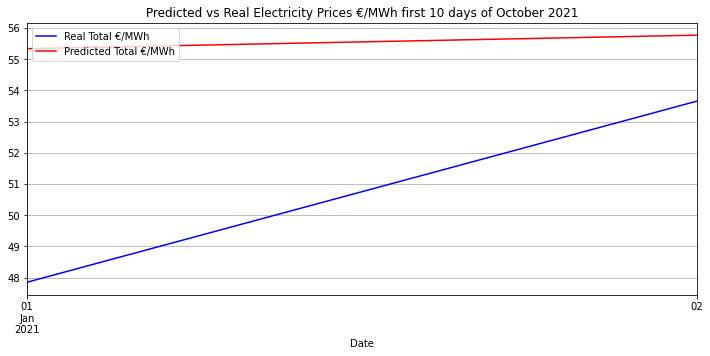

In [89]:
forecast_VAR['Total €/MWh'] = forecast_VAR[['Total €/MWh']].apply(pd.to_numeric, downcast="float", errors= "coerce")
electricity_prices_jan_2021['Total\n€/MWh'] = electricity_prices_jan_2021[['Total\n€/MWh']].apply(pd.to_numeric, downcast="float", errors= "coerce")

plt.figure(figsize=(12,5))
plt.xlabel("Date")

ax1 = electricity_prices_jan_2021["Total\n€/MWh"].plot(color= "blue", grid = True, label = "Real Total €/MWh")
ax2 = forecast_VAR["Total €/MWh"].plot(color= "red", grid = True, label = "Predicted Total €/MWh")

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title( "Predicted vs Real Electricity Prices €/MWh first 10 days of October 2021")
plt.show()

In [90]:
historical_brent = pd.read_csv("/home/dsc/CarpetaCompartida/TFM/historic_brent_prices.csv", dtype= str, sep= ";",
                               usecols= ["Date", "Último", "Apertura", "Máximo", "Mínimo"])

historical_brent["Date"] = pd.to_datetime(historical_brent["Date"], dayfirst=True)

In [91]:
days = pd.DataFrame(index = pd.date_range("2013-01-02", periods = 3118, freq = "D")).rename_axis("Date")

historical_brent_prices_allweek = pd.merge(days, historical_brent, on= "Date", indicator = True, how= "left")

#I'm going to use Friday's price for the weekend (as this is the latest price) and the previous day's price for the bank holidays
historical_brent_prices_allweek = historical_brent_prices_allweek.fillna(method= "ffill")
historical_brent_prices_allweek.set_index("Date", inplace= True)

In [92]:
historical_brent_prices_allweek.loc["2021-01-01":"2021-01-02"]

,Último,Apertura,Máximo,Mínimo,_merge
Date,,,,,
2021-01-01,"51,80","51,49","51,84","50,90",left_only
2021-01-02,"51,80","51,49","51,84","50,90",left_only


I think the model doesn't work too bad with short-term predictions.